In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
groq_api_key = user_secrets.get_secret("groq_api_key")
hf_api_key = user_secrets.get_secret("hf_api_key")
NEO4J_PASSWORD = user_secrets.get_secret("NEO4J_PASSWORD")
NEO4J_URI = user_secrets.get_secret("NEO4J_URI")
NEO4J_USERNAME = user_secrets.get_secret("NEO4J_USERNAME")
import huggingface_hub
huggingface_hub.login(token=hf_api_key)
huggingface_hub.auth_list()

  name   | token          
---------|---------------
* llms   | hf_****zPtR    


### Important Links
- https://neo4j.com/labs/genai-ecosystem/langchain/
- https://python.langchain.com/docs/integrations/vectorstores/neo4jvector/
- https://python.langchain.com/docs/tutorials/graph/
- https://www.tensorops.ai/post/knowledge-graph-rag-vs-vector-db-rag-is-it-time-for-graphdbs-to-shine#:~:text=Conclusion,the%20computational%20challenges%20in%20retrieval.

## Neo4j Login

In [5]:
from langchain_community.graphs import Neo4jGraph
from langchain_groq import ChatGroq
from typing import TypedDict, Annotated, List, Union
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field
from langchain_huggingface import HuggingFaceEmbeddings
import pandas as pd
from typing import List
# from pyprojroot import here
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:

graph = Neo4jGraph(
    url=NEO4J_URI,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD)

llm_model = ChatGroq(api_key = groq_api_key,
                     model_name = 'llama-3.3-70b-versatile')

In [7]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

embeddings = HuggingFaceEmbeddings(model_name="jinaai/jina-embeddings-v3",
                                  encode_kwargs = {'normalize_embeddings': True},
                                   model_kwargs = {'device': device,'trust_remote_code':'True',})

modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- rotary.py
- mha.py
- embedding.py
- block.py
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

In [8]:
sample_embeddings = embeddings.embed_query("Maninder Singh")
print(len(sample_embeddings))

1024


In [9]:
# test evaluator for embeddgins model
# lower the value of score more similliar it will be

from langchain.evaluation import load_evaluator

hf_evaluator = load_evaluator("embedding_distance",embeddings=embeddings)

hf_evaluator.evaluate_strings(prediction="I am comming tomorrow", reference="I will go")

{'score': 0.20788975396937748}

## Preparing and saving the Movie Data For Graph RAG

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv", nrows=20)
display(df.head(3))

print(df.shape)
print("="*40)
print(df.columns)
print("="*40)
print(df["title"][:20].values)

,movieId,released,title,actors,director,genres,imdbRating
0,1,1995-11-22,Toy Story,Jim Varney|Tim Allen|Tom Hanks|Don Rickles,John Lasseter,Adventure|Animation|Children|Comedy|Fantasy,8.3
1,2,1995-12-15,Jumanji,Robin Williams|Bradley Pierce|Kirsten Dunst|Jo...,Joe Johnston,Adventure|Children|Fantasy,6.9
2,3,1995-12-22,Grumpier Old Men,Walter Matthau|Ann-Margret|Jack Lemmon|Sophia ...,Howard Deutch,Comedy|Romance,6.6


(20, 7)
Index(['movieId', 'released', 'title', 'actors', 'director', 'genres',
       'imdbRating'],
      dtype='object')
['Toy Story' 'Jumanji' 'Grumpier Old Men' 'Waiting to Exhale'
 'Father of the Bride Part II' 'Heat' 'Sabrina' 'Tom and Huck'
 'Sudden Death' 'GoldenEye' 'American President, The'
 'Dracula: Dead and Loving It' 'Balto' 'Nixon' 'Cutthroat Island' 'Casino'
 'Sense and Sensibility' 'Four Rooms' 'Ace Ventura: When Nature Calls'
 'Money Train']


In [11]:
# Adding fake data in order to work with GraphRAG

# Just random Taglines:
tagline = ["The adventure takes off!",
"Roll the dice and unleash the excitement!",
"Still Yelling. Still Fighting. Still Ready for Love.",
"Friends are the people who let you be yourself... and never let you forget it.",
"Just When His World Is Back To Normal... He's In For The Surprise Of His Life!",
"A Los Angeles crime saga",
"You are cordially invited to the most surprising merger of the year.",
"The Original Bad Boys.",
"Terror goes into overtime.",
"No limits. No fears. No substitutes.",
"Why can't the most powerful man in the world have the one thing he wants most?",
"Give blood...a whole new meaning.",
"Part Dog. Part Wolf. All Hero.",
"He had greatness within his grasp.",
"The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime!",
"No one stays at the top forever.",
"Lose your heart and come to your senses.",
"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life.",
"New animals. New adventures. Same hair.",
"Get on, or GET OUT THE WAY!"]

location = ["United States", "United States", "United States", "United States", "United States", 
           "United States", "United States", "United States", "United States", "United Kingdom", 
           "United States", "United States", "United States", "United States", "Malta", 
           "United States", "United Kingdom", "United States", "United States", "United States"]

similar_movie = ["Finding Nemo", "Jumanji: Welcome to the Jungle", "The Bucket List", "The Best Man Holiday", "Cheaper by the Dozen", 
                 "The Departed", "Notting Hill", "The Adventures of Huck Finn", "Die Hard", "Mission Impossible", 
                 "Dave", "Dead and Loving It: Young Frankenstein", "Spirit: Stallion of the Cimarron", "JFK", "Pirates of the Caribbean: The Curse of the Black Pearl",
                 "Goodfellas", "Pride and Prejudice", "Pulp Fiction", "The Mask", "Speed"
                 ]

df["similar_movie"] = similar_movie
df["tagline"] = tagline
df["location"] = location
df.head(3)

# Saving the processed dataset
df.to_csv("movie.csv", sep=",", index=False)

## Creating Neo4j Graph from the dataset

**Import movie information from the CSV file with tagline, construct the knowledge graph, and store the data in the Graph database**

In [62]:
graph.query("""
MATCH (n)
DETACH DELETE n
""")

[]

In [63]:
# creating below input value just to make sure not to execute this code again for creating graph accidentaly
value = input("Do You realy want to execute this cell and create the GraphDB again ? y/n")

movie_csv_path = 'movie.csv'
if value == 'y':
    graph.query("""
    LOAD CSV WITH HEADERS FROM 
    'https://raw.githubusercontent.com/manindersingh120996/RAG-Related-Projects/refs/heads/main/movie.csv'
    AS row
    
    MERGE (m:Movie {id:row.movieId})
    SET m.released = row.released,
        m.title = row.title,
        m.tagline = row.tagline,
        m.imdbRating = toFloat(row.imdbRating)
    
    FOREACH (director in split(row.director, '|') |
        MERGE (p:Person {name:trim(director)})
        MERGE (p)-[:DIRECTED]->(m))
    
    FOREACH (actor in split(row.actors, '|') |
        MERGE (p:Person {name:trim(actor)})
        MERGE (p)-[:ACTED_IN] ->(m))
    
    FOREACH (genre in split(row.genres, '|') |
        MERGE (g:Genre {name:trim(genre)})
        MERGE (m)-[:IN_GENRE]->(g))
    
    MERGE (l:location {name:trim(row.location)})
    MERGE (m)-[:WAS_TAKEN_IN]->(l)
    
    MERGE (s:SimilarMovies {name:trim(row.similar_movie)})
    MERGE (m)-[:IS_SIMILAR_TO]->(s)
    """)

Do You realy want to execute this cell and create the GraphDB again ? y/n y


In [64]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {name: STRING}
Genre {name: STRING}
location {name: STRING}
SimilarMovies {name: STRING}
Movie {id: STRING, released: STRING, title: STRING, tagline: STRING, imdbRating: FLOAT}
Relationship properties:

The relationships:
(:Person)-[:DIRECTED]->(:Movie)
(:Person)-[:ACTED_IN]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)
(:Movie)-[:WAS_TAKEN_IN]->(:location)
(:Movie)-[:IS_SIMILAR_TO]->(:SimilarMovies)


In [65]:
enhanced_graph = Neo4jGraph(enhanced_schema=True,
                            url=NEO4J_URI,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD)
print(enhanced_graph.schema)

Node properties:
- **Person**
  - `name`: STRING Example: "Joe Johnston"
- **Genre**
  - `name`: STRING Example: "Adventure"
- **location**
  - `name`: STRING Available options: ['United States', 'United Kingdom', 'Malta']
- **SimilarMovies**
  - `name`: STRING Example: "Finding Nemo"
- **Movie**
  - `id`: STRING Example: "2"
  - `released`: STRING Available options: ['1995-12-15', '1995-12-22', '1995-12-08', '1995-11-17', '1996-01-05', '1995-11-22', '1996-01-26', '1995-12-25', '1995-11-10']
  - `title`: STRING Example: "Jumanji"
  - `tagline`: STRING Example: "Roll the dice and unleash the excitement!"
  - `imdbRating`: FLOAT Min: 5.6, Max: 8.3
Relationship properties:

The relationships:
(:Person)-[:DIRECTED]->(:Movie)
(:Person)-[:ACTED_IN]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)
(:Movie)-[:WAS_TAKEN_IN]->(:location)
(:Movie)-[:IS_SIMILAR_TO]->(:SimilarMovies)


In [66]:
# Match all nodes in the graph
cypher = """
  MATCH (n)
  RETURN count(n) as Total_Number_of_Nodes
  """
result = graph.query(cypher)
result

[{'Total_Number_of_Nodes': 155}]

## Creating Vector embedding from the Column of Choice

In [67]:
def embed_text(text:str)->List:
    """
    Embeds the given text using the specified model.

    Parameters:
        text (str): The text to be embedded.

    Returns:
        List: A list containing the embedding of the text.
    """
    response = embeddings.embed_query(text)
    
    return response

In [68]:
df["tagline"][:3]

0                             The adventure takes off!
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
Name: tagline, dtype: object

In [69]:
embedding_list = [embed_text(i) for i in df["tagline"]]
embedding_list
print("Number of vectors:", len(embedding_list))
print("Embedding dimension:", len(embedding_list[0]))
embedding_list[0][:5]

Number of vectors: 20
Embedding dimension: 1024


[0.07179950177669525,
 -0.16128422319889069,
 0.08366920053958893,
 0.07207692414522171,
 0.054663170129060745]

In [70]:
df["taglineEmbedding"] = embedding_list
df.head(3)

,movieId,released,title,actors,director,genres,imdbRating,similar_movie,tagline,location,taglineEmbedding
0,1,1995-11-22,Toy Story,Jim Varney|Tim Allen|Tom Hanks|Don Rickles,John Lasseter,Adventure|Animation|Children|Comedy|Fantasy,8.3,Finding Nemo,The adventure takes off!,United States,"[0.07179950177669525, -0.16128422319889069, 0...."
1,2,1995-12-15,Jumanji,Robin Williams|Bradley Pierce|Kirsten Dunst|Jo...,Joe Johnston,Adventure|Children|Fantasy,6.9,Jumanji: Welcome to the Jungle,Roll the dice and unleash the excitement!,United States,"[0.08879648894071579, -0.1628454178571701, 0.0..."
2,3,1995-12-22,Grumpier Old Men,Walter Matthau|Ann-Margret|Jack Lemmon|Sophia ...,Howard Deutch,Comedy|Romance,6.6,The Bucket List,Still Yelling. Still Fighting. Still Ready for...,United States,"[0.08526547998189926, -0.0664098709821701, 0.0..."


The query creates a vector index (movie_tagline_embeddings) in Neo4j for efficient similarity-based searches on taglineEmbedding properties of Movie nodes.

Purpose: Enables semantic retrieval of nodes using cosine similarity in a 1024-dimensional vector space, aligning with embeddings from models.

Role in GraphRAG:
Context Retrieval: Fetches semantically similar nodes to enrich prompts for generative models.
Scalability: Handles large datasets efficiently with reduced query latency.
Enhanced Generation Quality: Provides relevant context for precise and meaningful outputs.
This integration combines graph traversal with vector search, improving semantic retrieval and contextual augmentation in the GraphRAG workflow.


**STEPS TO CREATE VECTOR INDEX**

1. We first create a embedding of certain column in DataFrame and add it to DB or we can store it somewhere else . Important thing is to store it in such a way each vector can point towards it's corresponding value
2. we then create the empty vector index in VectorDB of same dimension as of vector embeddings create using embedding model.
3. We now will populate the Vector index(empty) with the vector embeddings create in first step into the Vector Graph DB so that we can perform vector search using it.

*IT is one of the most difficult part of handling with GraphDB i.e, preparing the correct graphDb and populating it with correct values.*

In [81]:
graph.query("""
DROP INDEX movie_tagline_embeddings""")

[]

In [82]:
# here it will create the vector index in the graphDB 
# for now it will be empty
# creating below input value just to make sure not to execute this code again for creating Vector index again 
value = input("Do You realy want to execute this cell and create the Vector Index again ? y/n")
if value == 'y':
    graph.query("""
      CREATE VECTOR INDEX movie_tagline_embeddings IF NOT EXISTS      // Create a vector index named 'movie_tagline_embeddings' if it doesn't already exist  
      FOR (m:Movie) ON (m.taglineEmbedding)                           // Index the 'taglineEmbedding' property of Movie nodes 
      OPTIONS { indexConfig: {                                        // Set options for the index
        `vector.dimensions`: 1024,                                    // Specify the dimensionality of the vector space (1024 dimensions)
        `vector.similarity_function`: 'cosine'                        // Specify the similarity function to be cosine similarity
      }}"""
    )

Do You realy want to execute this cell and create the Vector Index again ? y/n y


In [83]:
graph.query("""
SHOW VECTOR INDEXES  // Retrieves information about all the vector indexes in the Database
""")

[{'id': 2,
  'name': 'movie_tagline_embeddings',
  'state': 'ONLINE',
  'populationPercent': 100.0,
  'type': 'VECTOR',
  'entityType': 'NODE',
  'labelsOrTypes': ['Movie'],
  'properties': ['taglineEmbedding'],
  'indexProvider': 'vector-2.0',
  'owningConstraint': None,
  'lastRead': None,
  'readCount': 0}]

In [84]:
# Match all nodes in the graph
cypher = """
  MATCH (m:Movies)
  RETURN m.taglineEmbedding LIMIT 1
  """
result = graph.query(cypher)
result

[]

In [85]:
# populatring the Vector Indexes in the DB with the Vector Embedding Values
# creating below input value just to make sure not to execute this code again for creating graph accidentaly
value = input("Do You realy want to execute this cell and populate the Vector index again ? y/n")
if value == 'y':
    for index, row in df.iterrows():
        movie_id = row['movieId']
        embedding = row['taglineEmbedding']
        graph.query(f"MATCH (m:Movie {{id: '{movie_id}'}}) SET m.taglineEmbedding = {embedding}")

Do You realy want to execute this cell and populate the Vector index again ? y/n y


In [86]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {name: STRING}
Genre {name: STRING}
location {name: STRING}
SimilarMovies {name: STRING}
Movie {id: STRING, released: STRING, title: STRING, tagline: STRING, imdbRating: FLOAT, taglineEmbedding: LIST}
Relationship properties:

The relationships:
(:Person)-[:DIRECTED]->(:Movie)
(:Person)-[:ACTED_IN]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)
(:Movie)-[:WAS_TAKEN_IN]->(:location)
(:Movie)-[:IS_SIMILAR_TO]->(:SimilarMovies)


In [87]:
# testing the embedding by printing the result from the database
result = graph.query("""
    MATCH (m:Movie)
    WHERE m.tagline IS NOT NULL
    RETURN m.tagline, m.taglineEmbedding
    LIMIT 1
""")

In [88]:
result[0]['m.tagline'],len(result[0]['m.taglineEmbedding'])

('Roll the dice and unleash the excitement!', 1024)

## QnA with GraphDB with GraphCypherQAChain and GraphRAG Implementation

Since, so far vector indexes have been implemented into Neo4j Graph. Now we will be implementing Vector Search

> **NOTE:** It is also possible to just Retrive the data using Cypher query only from the database and then feeding answer retrived along with question to LLM to generate the answer.

In [23]:
q_one = "What was the cast of the Casino?"
q_two = "What are the most common genres for movies released in 1995?"
q_three = "What are the similar movies to the ones that Tom Hanks acted in?"

### First let's play with Simple Agent which converts our question to Cypher query which thus retrives the relevant answer and then along with question feeds it to LLM for answer generation

In [24]:
from langchain.chains import GraphCypherQAChain
# this we can call as the simple agent because here 
# we are running only two lines
# but it is not that powerfull as we will see for question 2 and question 3
# where question becomes more complicated

"""
One Tweak around this is using power full language model capable enough to
generate the correct CYPHER queries.
For example initially I used LLaMa 3.1 8B which failed in giving answer to two questions

then LLama 3.3 70B was able to give answer to 1st and 3rd.
"""
cypher_execution_chain = GraphCypherQAChain.from_llm(graph=graph,  # here it retrives the graph Schema
                                    llm=llm_model,
                                    verbose=True,
                                    allow_dangerous_requests=True)

In [25]:
response = cypher_execution_chain.invoke({"query": q_one})
print(response)
print("\nLLM response:", response["result"])



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person)-[:ACTED_IN]->(m:Movie {title: "Casino"}) RETURN p.name
Full Context:
[{'p.name': 'Robert De Niro'}, {'p.name': 'Joe Pesci'}, {'p.name': 'Sharon Stone'}, {'p.name': 'James Woods'}]

> Finished chain.
{'query': 'What was the cast of the Casino?', 'result': 'The cast of Casino included Robert De Niro, Joe Pesci, Sharon Stone, and James Woods.'}

LLM response: The cast of Casino included Robert De Niro, Joe Pesci, Sharon Stone, and James Woods.


In [26]:
response = cypher_execution_chain.invoke({"query": q_two})
print(response)
print("\nLLM response:", response["result"])



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (m:Movie)-[:IN_GENRE]->(g:Genre) 
WHERE m.released = "1995" 
RETURN g.name, COUNT(m) AS count 
ORDER BY count DESC;
Full Context:
[]

> Finished chain.
{'query': 'What are the most common genres for movies released in 1995?', 'result': "I don't know the answer."}

LLM response: I don't know the answer.


In [27]:
response = cypher_execution_chain.invoke({"query": q_three})
print(response)
print("\nLLM response:", response["result"])



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person {name: 'Tom Hanks'})-[:ACTED_IN]->(m:Movie)-[:IS_SIMILAR_TO]->(sm:SimilarMovies) RETURN sm.name
Full Context:
[{'sm.name': 'Finding Nemo'}]

> Finished chain.
{'query': 'What are the similar movies to the ones that Tom Hanks acted in?', 'result': 'Finding Nemo is similar to the movies that Tom Hanks acted in.'}

LLM response: Finding Nemo is similar to the movies that Tom Hanks acted in.


### Now we can Further Improve this Agent

we will guard rail and make Chains to understand our context and generate the query accordingly

---------------------------------------------------

1. Detecting entities in the user input
2. Match entities to database.
3. Define a custom Cypher prompt that takes the entity mapping information along with the schema and the user question to construct a Cypher statement.
4. Generating answers based on database results

**Strategies to improve graph database query generation by mapping values from user inputs to database**
When using the built-in graph chains, the LLM is aware of the graph schema, but has no information about the values of properties stored in the database. Therefore, we can introduce a new step in graph database QA system to accurately map values.

**Detecting entities in the user input**

We have to extract the types of entities/values we want to map to a graph database. In this example, we are dealing with a movie graph, so we can map movies and people to the database.

In [28]:
from typing import List

# from langchain.chains.openai_functions import create_structured_output_chain
from langchain.chains import create_structured_output_runnable
from langchain_core.prompts import ChatPromptTemplate
# from langchain_core.pydantic_v1 import BaseModel, Field

from pydantic import BaseModel, Field, field_validator
class Entities(BaseModel):
    """Identifying information about entities and 
    extract person, movies, and years entitites from the text."""

    names: List[str] = Field(
        ...,
        description="All the person , year or movies appearing in the text",
    )



entity_extractor_model = llm_model.with_structured_output(Entities)

# entity_chain = create_structured_output_runnable(Person, llm_model, prompt)

In [29]:
entity_extractor_model.invoke('Hello my name is maninder.I am born in 1996 and my fav movie is Jumangji')

Entities(names=['maninder', '1996', 'Jumangji'])

In [30]:
entities_q_two = entity_extractor_model.invoke(q_two)
print(entities_q_two)
entities_q_three = entity_extractor_model.invoke(q_three)
print(entities_q_three)

names=['1995']
names=['Tom Hanks']


Utilizing a simple CONTAINS clause to match entities to database. In practice, you might want to use a fuzzy search or a fulltext index to allow for minor misspellings.

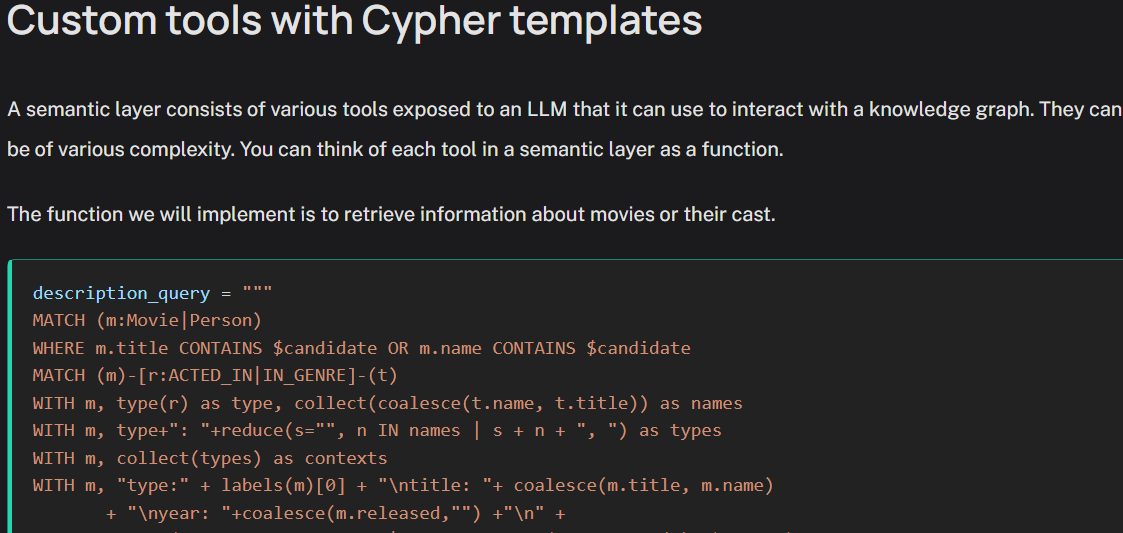

In [33]:

match_query = """
MATCH (m:Movie|Person)
WHERE m.title CONTAINS $value OR m.name CONTAINS $value OR m.released CONTAINS $value
MATCH (m)-[r:ACTED_IN|IN_GENRE]-(t)
WITH m, type(r) as type, collect(coalesce(t.name, t.title)) as names
WITH m, type+": "+reduce(s="", n IN names | s + n + ", ") as types
WITH m, collect(types) as contexts
WITH m, "type:" + labels(m)[0] + "\ntitle: "+ coalesce(m.title, m.name) 
       + "\nyear: "+coalesce(m.released,"") +"\n" +
       reduce(s="", c in contexts | s + substring(c, 0, size(c)-2) +"\n") as result
RETURN result
"""

def map_to_database(values)->str:
    """
    Maps the values to entities in the database and returns the mapping information.

    Args:
        values (list): A list of values to map to entities in the database.

    Returns:
        str: A string containing the mapping information of each value to entities in the 
    """
    result = ""
    for entity in values.names:
        response = graph.query(match_query, {"value": entity})
        # print(response)
        try:
            for values in response:
                result += f"{entity} maps to {values['result']}  in database\n" # Query the database to find the mapping for the entity
        except IndexError:
            pass
    return result

In [34]:
entities_q_three

Entities(names=['Tom Hanks'])

In [35]:
print("2:", map_to_database(entities_q_two))
print("3:", map_to_database(entities_q_three))

2: 1995 maps to type:Movie
title: Jumanji
year: 1995-12-15
ACTED_IN: Robin Williams, Bradley Pierce, Kirsten Dunst, Jonathan Hyde
IN_GENRE: Adventure, Children, Fantasy
  in database
1995 maps to type:Movie
title: Grumpier Old Men
year: 1995-12-22
ACTED_IN: Walter Matthau, Ann-Margret, Jack Lemmon, Sophia Loren
IN_GENRE: Comedy, Romance
  in database
1995 maps to type:Movie
title: Waiting to Exhale
year: 1995-12-22
ACTED_IN: Whitney Houston, Lela Rochon, Angela Bassett, Loretta Devine
IN_GENRE: Comedy, Romance, Drama
  in database
1995 maps to type:Movie
title: Father of the Bride Part II
year: 1995-12-08
ACTED_IN: Steve Martin, Kimberly Williams-Paisley, Diane Keaton, Martin Short
IN_GENRE: Comedy
  in database
1995 maps to type:Movie
title: Heat
year: 1995-12-15
ACTED_IN: Al Pacino, Robert De Niro, Val Kilmer, Jon Voight
IN_GENRE: Action, Crime, Thriller
  in database
1995 maps to type:Movie
title: Sabrina
year: 1995-12-15
ACTED_IN: Julia Ormond, Harrison Ford, Nancy Marchand, Greg K

In [36]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# Generate Cypher statement based on natural language input
cypher_template = """Based on the Neo4j graph schema below, write a Cypher query that would answer the user's question:
{schema}
Entities in the question map to the following database values:
{entities_list}
Question: {question}
Note: Do not include any explanations or apologies in your responses.
Do not wrap the response in any backticks or anything else.
Respond with a Cypher statement only!
Cypher query:"""  # noqa: E501

cypher_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Given an input question, convert it to a Cypher query. No pre-amble.",
        ),
        ("human", cypher_template),
    ]
)
# cypher_prompt.invoke({'schema'})

chain = cypher_prompt | llm_model.bind(stop=["\nCypherResult:"]) | StrOutputParser()


Generating answers based on database results

Now that we have a chain that generates the Cypher statement, we need to execute the Cypher statement against the database and send the database results back to an LLM to generate the final answer. Again, we will be using LCEL

In [44]:
from langchain.chains.graph_qa.cypher_utils import CypherQueryCorrector, Schema

# Cypher validation tool for relationship directions
corrector_schema = [
    Schema(el["start"], el["type"], el["end"])
    for el in graph.structured_schema.get("relationships")
]
cypher_validation = CypherQueryCorrector(corrector_schema)

# Generate natural language response based on database results
response_template = """Based on the the question, Cypher query, and Cypher response, write a natural language response:
Question: {question}
Cypher query: {query}
Cypher Response: {response}"""

response_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Given an input question and Cypher response, convert it to a natural"
            " language answer.Give the answer in Structured format such a Visually appealing to Read to user."
            
            "No pre-amble.",
        ),
        ("human", response_template),
    ]
)

chain_2 = response_prompt | llm_model | StrOutputParser()


In [45]:
from IPython.display import Markdown as md
def questions_asked(question_asked:str):
    question = question_asked
    entities = entity_extractor_model.invoke(question)
    entities_list = map_to_database(entities)
    schema = graph.get_schema
    chain = cypher_prompt | llm_model.bind(stop=["\nCypherResult:"]) | StrOutputParser()
    cypher_query = chain.invoke({'schema': schema,
                 'entities_list': entities_list,
                 'question': question})
    
    print(f"Cypher Query Generated : {cypher_query}")
    print("="*40)
    graph.query(cypher_query)
    
    final_answer = chain_2.invoke({'response': graph.query(cypher_query),
                 'query': cypher_query,
                 'question': question})
    
    print(f'Final Answer for Question : "{question}" --> \n {final_answer}')


In [46]:
questions_asked(q_one)

Cypher Query Generated : MATCH (p:Person)-[:ACTED_IN]->(m:Movie {title: 'Casino'}) RETURN p.name
Final Answer for Question : "What was the cast of the Casino?" --> 
 **Cast of Casino**

The main cast of the movie "Casino" includes:

* **Robert De Niro**
* **Joe Pesci**
* **Sharon Stone**
* **James Woods**

These actors played key roles in the film, bringing the story to life with their performances.


In [47]:
questions_asked(q_two)

Cypher Query Generated : MATCH (m:Movie)-[:IN_GENRE]->(g:Genre) 
WHERE m.released STARTS WITH '1995' 
RETURN g.name AS Genre, COUNT(m) AS Count 
ORDER BY Count DESC;
Final Answer for Question : "What are the most common genres for movies released in 1995?" --> 
 **Most Common Genres for Movies Released in 1995**

The top genres for movies released in 1995 are:

1. **Comedy**: 10 movies
2. **Adventure**: 6 movies
3. **Romance**: 5 movies
4. **Action**: 5 movies
5. **Children**: 4 movies
6. **Drama**: 4 movies
7. **Crime**: 3 movies
8. **Thriller**: 3 movies
9. **Fantasy**: 2 movies
10. **Animation**: 2 movies
11. **Horror**: 1 movie

These genres represent the most popular categories for films released in 1995, with Comedy being the most prominent.


In [48]:
questions_asked(q_three)

Cypher Query Generated : MATCH (p:Person {name: 'Tom Hanks'})-[:ACTED_IN]->(m:Movie)-[:IS_SIMILAR_TO]->(sm:SimilarMovies) RETURN sm.name
Final Answer for Question : "What are the similar movies to the ones that Tom Hanks acted in?" --> 
 **Similar Movies to Tom Hanks' Films**

Based on our analysis, we found a movie similar to the ones Tom Hanks has acted in:
* **Finding Nemo**

These movies share similar themes, genres, or elements that made Tom Hanks' films enjoyable. If you liked his movies, you might also appreciate **Finding Nemo**.


In [49]:
questions_asked("From the movies that were taken in United States, how many had the comedy genre?")

Cypher Query Generated : MATCH (m:Movie)-[:WAS_TAKEN_IN]->(l:location {name: 'United States'})-[:IN_GENRE]->(g:Genre {name: 'Comedy'}) 
RETURN COUNT(m)
Final Answer for Question : "From the movies that were taken in United States, how many had the comedy genre?" --> 
 **Response**
### Question Summary
The question asks for the number of movies taken in the United States that belong to the comedy genre.

### Query Details
- **Query Type**: Cypher query
- **Match Condition**: Movies taken in the United States and categorized under the comedy genre.
- **Return Value**: Count of movies matching the condition.

### Answer
Based on the Cypher query and response, **there are 0 movies** that were taken in the United States and belong to the comedy genre.


In [51]:
questions_asked("How Many Movies are there in Action genre?")

Cypher Query Generated : MATCH (m:Movie)-[:IN_GENRE]->(g:Genre {name: 'Action'}) RETURN count(m)
Final Answer for Question : "How Many Movies are there in Action genre?" --> 
 **Answer Summary**

* **Question**: Number of movies in the Action genre
* **Result**: There are **5** movies in the Action genre.


### It takes more time than a GraphRAG to implement proper Graph QnA agent and interacting with graph DB thus having knowledge of what and How to build proper Knowledge graph helps a lot in QnA as in this case we know what we are looking for.

## Doing Graph RAG

Vecotr embeddings we have created earlier, now we will be performing vector search on the Vector embeddings.<br>
For this we will perform Vector Search using the question's embeddings on the vector index of the graph database and get the results

**NOTE : Currently we are relying on only the taglines column of the data to retrive our answer. In case for a single column we are relying on for retriving the result using vector search in graph DB we have to make sure that particular column actualy contains all the information.**

In [89]:
question = "What are the movies about the Crime ?"
question_embeddings = embed_text(question)
question_embeddings[:10]


[0.02048073336482048,
 -0.15319082140922546,
 0.05562968552112579,
 0.12678958475589752,
 -0.0365048311650753,
 0.031025417149066925,
 0.018207605928182602,
 0.050932206213474274,
 -0.12333308160305023,
 -0.004759357776492834]

In [92]:
result = graph.query("""
with $question_embedding as question_embedding
CALL db.index.vector.queryNodes(
    'movie_tagline_embeddings',
    $top_k,
    question_embedding
    ) YIELD node AS movie, score
RETURN movie.title, movie.tagline, score
""",
params={
    "question_embedding":question_embeddings,
    "top_k":3
})
print(result)

[{'movie.title': 'Heat', 'movie.tagline': 'A Los Angeles crime saga', 'score': 0.8117642402648926}, {'movie.title': 'Tom and Huck', 'movie.tagline': 'The Original Bad Boys.', 'score': 0.747063159942627}, {'movie.title': 'Sudden Death', 'movie.tagline': 'Terror goes into overtime.', 'score': 0.7147660255432129}]


In [94]:
# since these tagline's are randomly created, the movie may not be trule representing the expected answer as 
# answer is retrived on the basis of vector simillarity with the Tagline_embeddings
import pprint
pprint.pprint(result)

[{'movie.tagline': 'A Los Angeles crime saga',
  'movie.title': 'Heat',
  'score': 0.8117642402648926},
 {'movie.tagline': 'The Original Bad Boys.',
  'movie.title': 'Tom and Huck',
  'score': 0.747063159942627},
 {'movie.tagline': 'Terror goes into overtime.',
  'movie.title': 'Sudden Death',
  'score': 0.7147660255432129}]


### Generating the final Answer with the Retrived Result


In [101]:
prompt = f"# Question:\n{question}\n\n# Graph DB search results:\n{result}"
messages = [
    {"role": "system", "content": str(
        "You will be given the user question along with the search result of that question over a Neo4j graph database. Give the user the proper answer."
    )},
    {"role": "user", "content": prompt}
]

response = llm_model.invoke(messages)

print(response.content)

The movies about crime are: 

1. **Heat** - A Los Angeles crime saga
2. **Tom and Huck** - The Original Bad Boys.
3. **Sudden Death** - Terror goes into overtime.

These movies have been identified as being related to the crime genre based on their taglines and have been ranked with scores of 0.81, 0.75, and 0.71 respectively, indicating their relevance to the crime theme.


In [110]:
def rag_pipeline(question:str):
    question_embeddings = embed_text(question)
    result = graph.query("""
with $question_embedding as question_embedding
CALL db.index.vector.queryNodes(
    'movie_tagline_embeddings',
    $top_k,
    question_embedding
    ) YIELD node AS movie, score
RETURN movie.title, movie.tagline, score
""",
params={
    "question_embedding":question_embeddings,
    "top_k":5
})
    prompt = f"# Question:\n{question}\n\n# Graph DB search results:\n{result}"
    messages = [
    {"role": "system", "content": str(
        "You will be given the user question along with the search result of that question over a Neo4j graph database. Give the user the proper answer."
    )},
    {"role": "user", "content": prompt}
]

    response = llm_model.invoke(messages)
    return response
    
    

In [111]:
answer = rag_pipeline("What all are the movies about the Adventures ?")

In [112]:
print(answer.content)

Based on the search results, the movies related to adventures are:

1. **Toy Story** - with the tagline "The adventure takes off!"
2. **Cutthroat Island** - with the tagline "Discover the Adventure of a Lifetime!"
3. **Ace Ventura: When Nature Calls** - with the tagline "New animals. New adventures. Same hair."

These three movies have taglines that explicitly mention "adventure" or "adventures", suggesting that they are about exciting journeys or quests. The other movies in the search results, such as **Tom and Huck** and **Balto**, do not have taglines that mention adventures, so they may not be as directly related to the topic.
